# Lab1


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Get the Data

In [ ]:
df = pd.read_csv("/content/ds_salaries.csv")
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


# Data Preprocessing

In [ ]:
df.isnull().sum()

,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
employee_residence,0
remote_ratio,0
company_location,0


In [ ]:
print(df['work_year'].value_counts())

work_year
2023    1785
2022    1664
2021     230
2020      76
Name: count, dtype: int64


In [ ]:
df.drop(columns=['salary', 'salary_currency'], inplace=True)

In [ ]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,CA,100,CA,M


In [ ]:
df['job_title'].describe()

,job_title
count,3755
unique,93
top,Data Engineer
freq,1040


In [ ]:
df.nlargest(3, 'salary_in_usd')

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3522,2020,MI,FT,Research Scientist,450000,US,0,US,M
2011,2022,MI,FT,Data Analyst,430967,GB,0,GB,M
528,2023,SE,FT,AI Scientist,423834,IL,0,IL,L


In [ ]:
df.nsmallest(3, 'salary_in_usd')

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
2684,2022,MI,FT,NLP Engineer,5132,CZ,100,CZ,M
2578,2021,EN,FT,Power BI Developer,5409,IN,50,IN,L
3537,2021,MI,PT,3D Computer Vision Researcher,5409,IN,50,IN,M


#Побудуємо графік (heatmap), щоб побачити взаємозв’язки між числовими ознаками, включаючи зв'язок із цільовою змінною salary_in_usd.


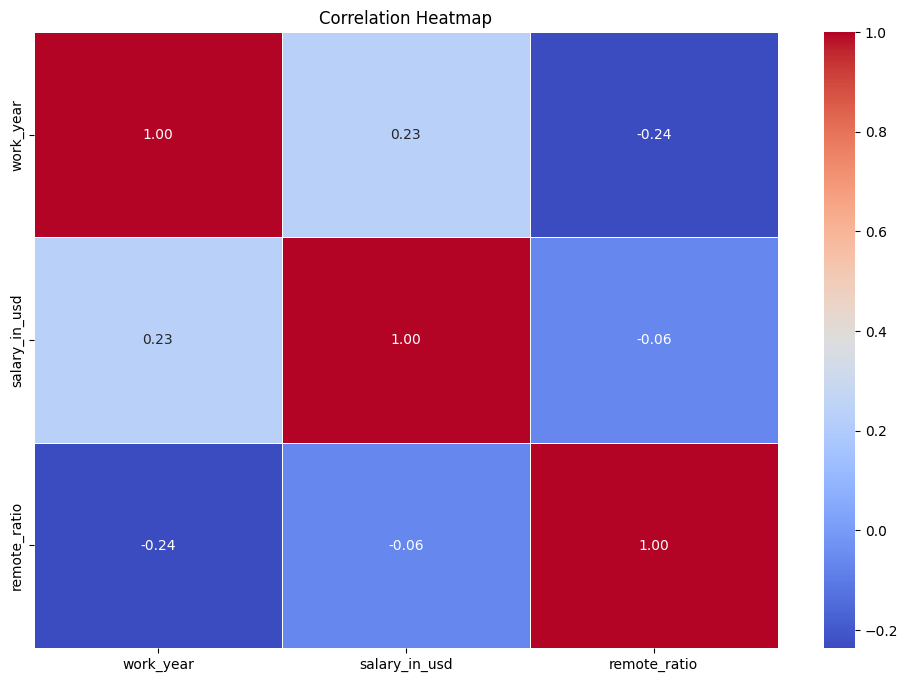

In [ ]:
# Calculate correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Plot heatmap of correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

#Тепер побудую гістограми розподілу та boxplot-и для кількох ознак.

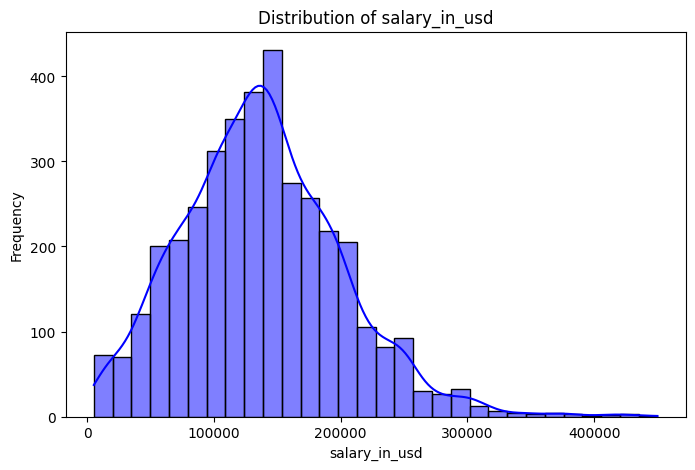

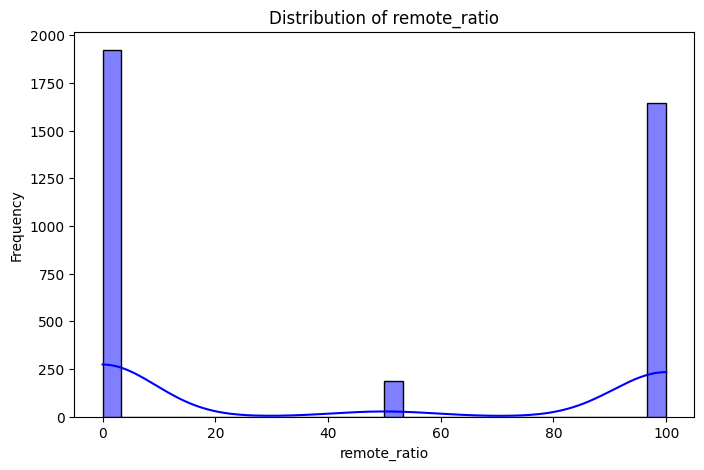

<ipython-input-39-ad1eabf0ed7a>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['company_size'], y=df[col], palette='Set3')


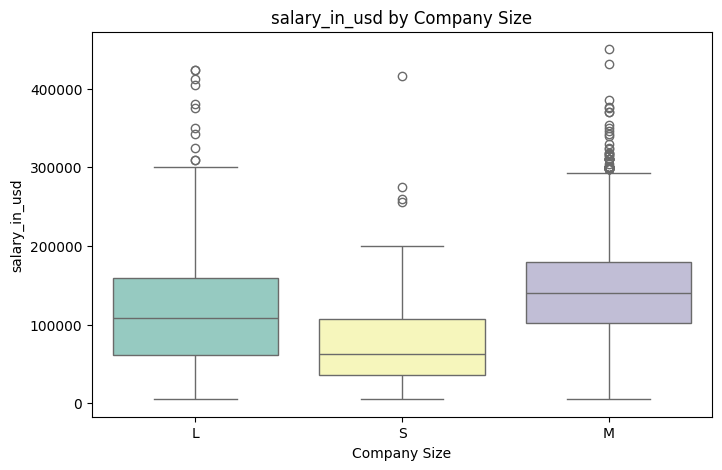

<ipython-input-39-ad1eabf0ed7a>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['company_size'], y=df[col], palette='Set3')


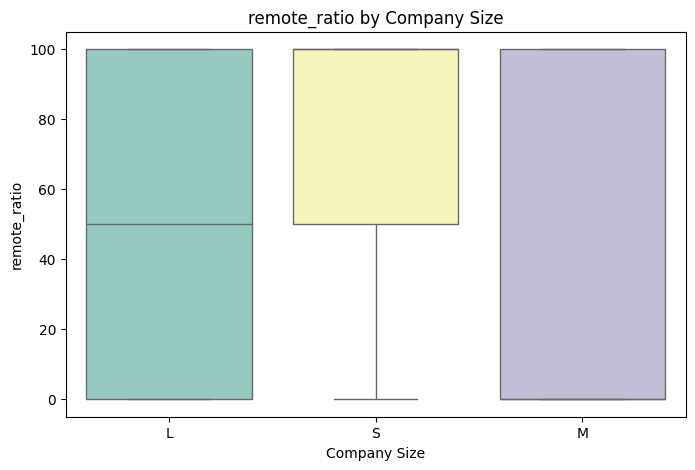

In [ ]:
# Select a few numeric columns for visualization
numeric_columns = ['salary_in_usd', 'remote_ratio']

# Plot histograms
for col in numeric_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Plot boxplots for the same columns relative to a categorical variable (e.g., company_size)
for col in numeric_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df['company_size'], y=df[col], palette='Set3')
    plt.title(f'{col} by Company Size')
    plt.xlabel('Company Size')
    plt.ylabel(col)
    plt.show()

#Наступним кроком буде нормалізація даних. ​

In [ ]:
# Select numeric features for normalization
features_to_normalize = ['salary_in_usd', 'remote_ratio']
scaler = MinMaxScaler()

# Normalize the selected features
data_normalized = df.copy()
data_normalized[features_to_normalize] = scaler.fit_transform(df[features_to_normalize])

# Display the first few rows of the normalized dataset
data_normalized.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,0.181436,ES,1.0,ES,L
1,2023,MI,CT,ML Engineer,0.055900,US,1.0,US,S
2,2023,MI,CT,ML Engineer,0.045784,US,1.0,US,S
3,2023,SE,FT,Data Scientist,0.381839,CA,1.0,CA,M
4,2023,SE,FT,Data Scientist,0.258207,CA,1.0,CA,M


#Нормалізацію ознак salary_in_usd та remote_ratio виконано. Тепер проведу навчання класифікаторів: kNN, дерево ухвалення рішень, SVM, Random Forest, та AdaBoost. Почнемо з підготовки даних для навчання.

In [ ]:
# Define target variable and features
target = 'company_size'
features = ['salary_in_usd', 'remote_ratio']

# Encode the target variable
label_encoder = LabelEncoder()
data_normalized[target] = label_encoder.fit_transform(data_normalized[target])

# Split data into training and testing sets
X = data_normalized[features]
y = data_normalized[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

X_train.shape, X_test.shape

((2628, 2), (1127, 2))

#Дані поділено на тренувальну (2628 рядків) та тестову (1127 рядків) вибірки. Продовжую навчання класифікаторів, починаючи з kNN. ​

In [ ]:
# Hyperparameter tuning for kNN
best_k = 0
best_score = 0

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    if score > best_score:
        best_score = score
        best_k = k

# Train the best kNN model
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)
y_pred_knn = best_knn.predict(X_test)

In [ ]:
print("\nBest k for kNN:", best_k)
print("Classification Report for kNN:\n", classification_report(y_test, y_pred_knn, target_names=label_encoder.classes_))
print("Confusion Matrix for kNN:\n", confusion_matrix(y_test, y_pred_knn))


Best k for kNN: 17
Classification Report for kNN:
               precision    recall  f1-score   support

           L       0.55      0.30      0.39       136
           M       0.88      0.98      0.92       946
           S       0.00      0.00      0.00        45

    accuracy                           0.86      1127
   macro avg       0.48      0.43      0.44      1127
weighted avg       0.80      0.86      0.82      1127

Confusion Matrix for kNN:
 [[ 41  95   0]
 [ 23 923   0]
 [ 10  35   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Для kNN було визначено оптимальне значення параметра
k=17, що забезпечило точність на тестовій вибірці 86%.

#Продовжую з навчанням дерева ухвалення рішень.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Train a Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred_tree = decision_tree.predict(X_test)

# Evaluate the Decision Tree model
tree_report = classification_report(y_test, y_pred_tree, target_names=label_encoder.classes_)
tree_conf_matrix = confusion_matrix(y_test, y_pred_tree)

print("\nClassification Report for Decision Tree:\n", classification_report(y_test, y_pred_tree, target_names=label_encoder.classes_))
print("Confusion Matrix for Decision Tree:\n", confusion_matrix(y_test, y_pred_tree))


Classification Report for Decision Tree:
               precision    recall  f1-score   support

           L       0.44      0.35      0.39       136
           M       0.90      0.93      0.92       946
           S       0.14      0.13      0.14        45

    accuracy                           0.83      1127
   macro avg       0.49      0.47      0.48      1127
weighted avg       0.82      0.83      0.82      1127

Confusion Matrix for Decision Tree:
 [[ 48  70  18]
 [ 49 879  18]
 [ 13  26   6]]


#Далі проведемо навчання моделі для SVM.

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define parameter grid for SVM
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']}

# Perform GridSearch to find the best parameters for SVM
grid_svm = GridSearchCV(SVC(), param_grid, refit=True, verbose=0, scoring='accuracy', cv=5)
grid_svm.fit(X_train, y_train)

# Get the best parameters and evaluate the model
best_svm = grid_svm.best_estimator_
y_pred_svm = best_svm.predict(X_test)

# Evaluate the SVM model
svm_report = classification_report(y_test, y_pred_svm, target_names=label_encoder.classes_)
svm_conf_matrix = confusion_matrix(y_test, y_pred_svm)

grid_svm.best_params_, grid_svm.best_score_, svm_report, svm_conf_matrix

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


({'C': 1, 'gamma': 1, 'kernel': 'rbf'},
 0.8565497012493211,
 '              precision    recall  f1-score   support\n\n           L       0.60      0.27      0.37       136\n           M       0.87      0.98      0.92       946\n           S       0.00      0.00      0.00        45\n\n    accuracy                           0.86      1127\n   macro avg       0.49      0.42      0.43      1127\nweighted avg       0.80      0.86      0.82      1127\n',
 array([[ 37,  99,   0],
        [ 18, 928,   0],
        [  7,  38,   0]]))

#Продовжуємо з Random Forest.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest classifier
random_forest = RandomForestClassifier(random_state=42, n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)

print("\nBest parameters for SVM:", grid_svm.best_params_)
print("Classification Report for SVM:\n", classification_report(y_test, y_pred_svm, target_names=label_encoder.classes_))
print("Confusion Matrix for SVM:\n", confusion_matrix(y_test, y_pred_svm))


Best parameters for SVM: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
Classification Report for SVM:
               precision    recall  f1-score   support

           L       0.60      0.27      0.37       136
           M       0.87      0.98      0.92       946
           S       0.00      0.00      0.00        45

    accuracy                           0.86      1127
   macro avg       0.49      0.42      0.43      1127
weighted avg       0.80      0.86      0.82      1127

Confusion Matrix for SVM:
 [[ 37  99   0]
 [ 18 928   0]
 [  7  38   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#Тепер AdaBoost

In [ ]:
adaboost = AdaBoostClassifier(random_state=42, n_estimators=100)
adaboost.fit(X_train, y_train)
y_pred_ada = adaboost.predict(X_test)
print("\nClassification Report for AdaBoost:\n", classification_report(y_test, y_pred_ada, target_names=label_encoder.classes_))
print("Confusion Matrix for AdaBoost:\n", confusion_matrix(y_test, y_pred_ada))


Classification Report for AdaBoost:
               precision    recall  f1-score   support

           L       0.30      0.07      0.12       136
           M       0.85      0.99      0.91       946
           S       0.00      0.00      0.00        45

    accuracy                           0.84      1127
   macro avg       0.38      0.35      0.34      1127
weighted avg       0.75      0.84      0.78      1127

Confusion Matrix for AdaBoost:
 [[ 10 126   0]
 [ 14 932   0]
 [  9  36   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


               Accuracy  Precision    Recall  F1 Score
kNN            0.855368   0.802628  0.855368  0.822271
Decision Tree  0.827862   0.815110  0.827862  0.820772
SVM            0.856256   0.803433  0.856256  0.819800
Random Forest  0.828749   0.816426  0.828749  0.821452
AdaBoost       0.835847   0.751666  0.835847  0.781259


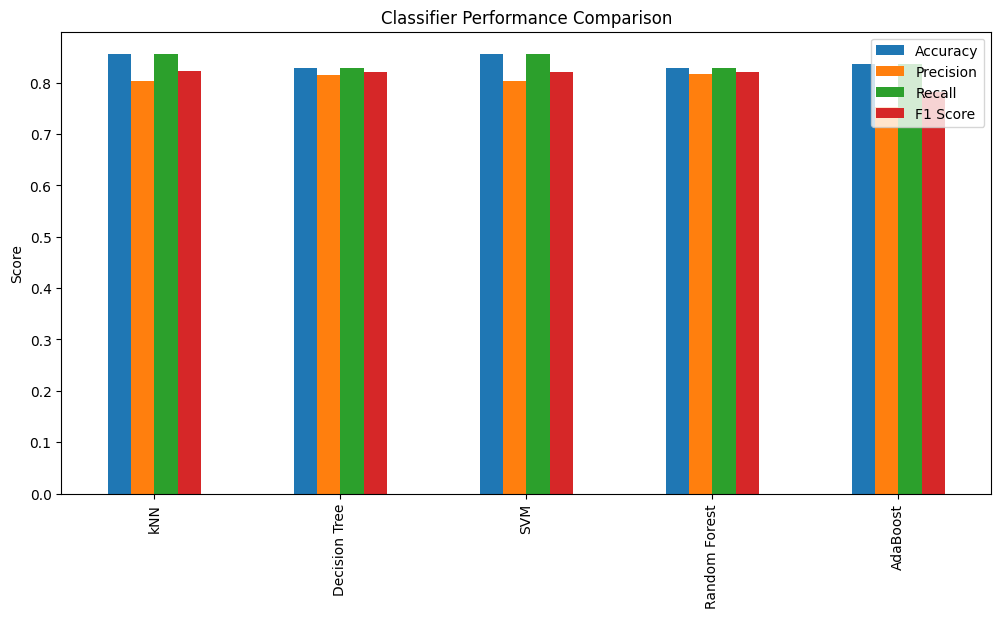

In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize a dictionary to store results
results = {}

# Add metrics for each classifier
results['kNN'] = {
    'Accuracy': accuracy_score(y_test, y_pred_knn),
    'Precision': precision_score(y_test, y_pred_knn, average='weighted'),
    'Recall': recall_score(y_test, y_pred_knn, average='weighted'),
    'F1 Score': f1_score(y_test, y_pred_knn, average='weighted')
}

results['Decision Tree'] = {
    'Accuracy': accuracy_score(y_test, y_pred_tree),
    'Precision': precision_score(y_test, y_pred_tree, average='weighted'),
    'Recall': recall_score(y_test, y_pred_tree, average='weighted'),
    'F1 Score': f1_score(y_test, y_pred_tree, average='weighted')
}

results['SVM'] = {
    'Accuracy': accuracy_score(y_test, y_pred_svm),
    'Precision': precision_score(y_test, y_pred_svm, average='weighted'),
    'Recall': recall_score(y_test, y_pred_svm, average='weighted'),
    'F1 Score': f1_score(y_test, y_pred_svm, average='weighted')
}

results['Random Forest'] = {
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'Precision': precision_score(y_test, y_pred_rf, average='weighted'),
    'Recall': recall_score(y_test, y_pred_rf, average='weighted'),
    'F1 Score': f1_score(y_test, y_pred_rf, average='weighted')
}

results['AdaBoost'] = {
    'Accuracy': accuracy_score(y_test, y_pred_ada),
    'Precision': precision_score(y_test, y_pred_ada, average='weighted'),
    'Recall': recall_score(y_test, y_pred_ada, average='weighted'),
    'F1 Score': f1_score(y_test, y_pred_ada, average='weighted')
}

# Convert to DataFrame for easier visualization
import pandas as pd
results_df = pd.DataFrame(results).T

# Display the comparison
print(results_df)

# Plot the comparison
results_df.plot(kind='bar', figsize=(12, 6), title='Classifier Performance Comparison')
plt.ylabel('Score')
plt.show()